# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [91]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [92]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999997
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


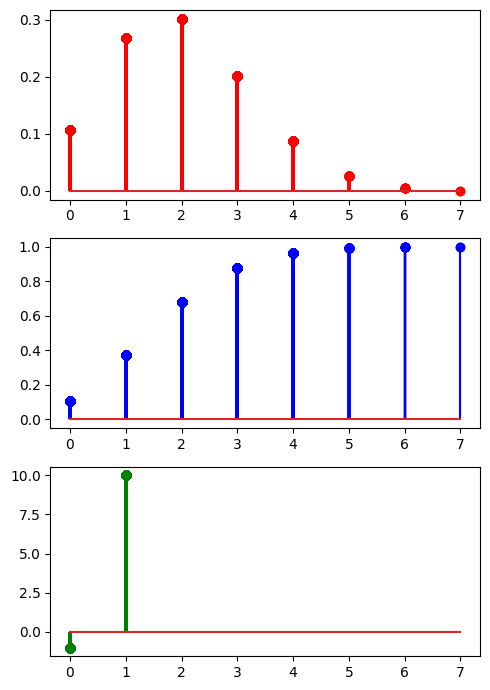

In [93]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

### Distribución normal

In [94]:
from scipy.stats import norm

def dnorm(x, mean = 0, std = 1):
    """
    Calcula la estimación puntual de la distribución normal.
    """
    result = norm.pdf(x, loc = mean, scale = std)

    return result

def pnorm(x, mean = 0, std = 1):
    """
    Calcula el acumulado de la distribución normal.
    """
    result = norm.cdf(x = x, loc = mean, scale = std)

    return result

def qnorm(p, mean = 0, std = 1):
    """
    Calcula la función cuantil a partir de la distribución normal.
    """
    result = norm.ppf(q = p, loc = mean, scale = std)

    return result

def rnorm(n, mean = 0, std = 1):
    """
    Genera variables aleatorias a partir de la distribución normal.
    """
    result = norm.rvs(size = n, loc = mean, scale = std)

    return result

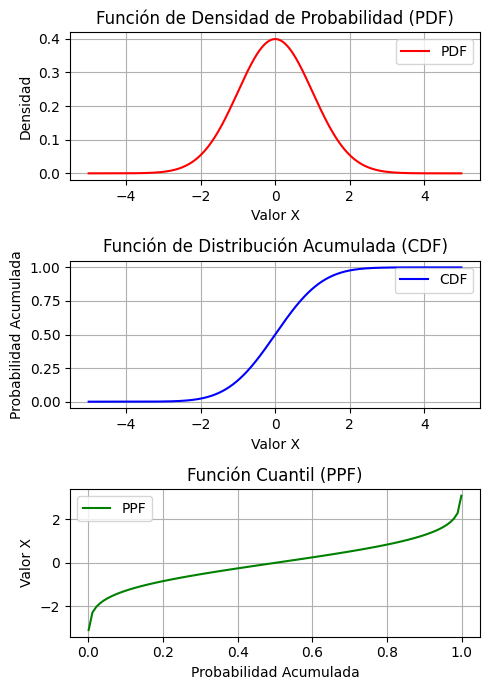

In [95]:
import matplotlib.pyplot as plt
import numpy as np

def setup_plot(ax, x_data, y_data, color_style, label, titulo, ylabel, xlabel=None):
    ax.plot(x_data, y_data, color_style, label=label)
    ax.set_title(titulo)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)
    ax.legend()

np.random.seed(42)

mean = 0
std = 1
data = np.arange(-5, 5, 0.01)
percentiles = np.linspace(0.001, 0.999, 100)

pmf = dnorm(data, mean=mean, std=std)
cdf = pnorm(data, mean=mean, std=std)
ppf = qnorm(percentiles, mean=mean, std=std)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))
setup_plot(axis[0], data, pmf, "r-", "PDF",
           "Función de Densidad de Probabilidad (PDF)", "Densidad", "Valor X")
setup_plot(axis[1], data, cdf, "b-", "CDF",
           "Función de Distribución Acumulada (CDF)", "Probabilidad Acumulada", "Valor X")
setup_plot(axis[2], percentiles, ppf, "g-", "PPF",
           "Función Cuantil (PPF)", "Valor X", "Probabilidad Acumulada")

plt.tight_layout()
plt.show()

### Distribución uniforme

In [96]:
from scipy.stats import uniform

def dunif(x, low = 0, high = 1):
    """
    Calcula la estimación puntual de la distribución uniforme.
    """
    result = uniform.pdf(x, loc = low, scale = (high - low))

    return result

def punif(q, low = 0, high = 1):
    """
    Calcula el acumulado de la distribución uniforme.
    """
    result = uniform.cdf(q, loc = low, scale = (high - low))

    return result

def qunif(p, low = 0, high = 1):
    """
    Calcula la función cuantil a partir de la distribución uniforme.
    """
    result = uniform.ppf(p, loc = low, scale = (high - low))

    return result

def runif(n, low = 0, high = 1):
    """
    Genera variables aleatorias a partir de la distribución uniforme.
    """
    result = uniform.rvs(loc = low, scale = (high - low), size = n)

    return result

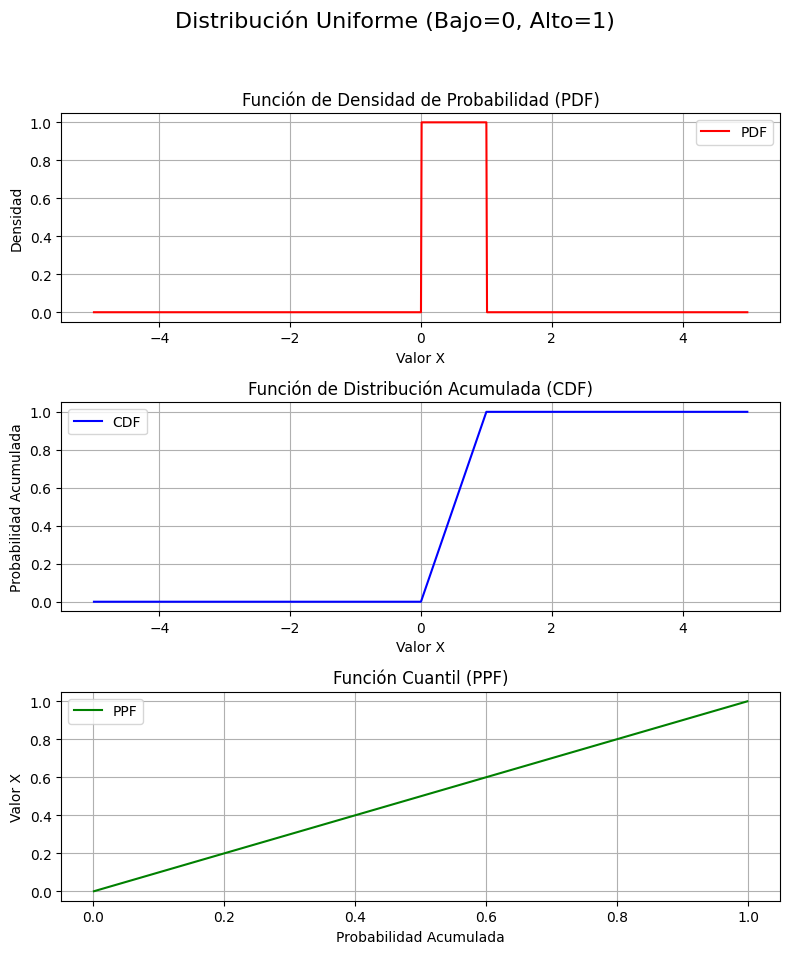

In [97]:
np.random.seed(42)

low = 0
high = 1

data_range = np.arange(-5, 5, 0.01)
percentiles = np.linspace(0.001, 0.999, 100)

pmf = dunif(data_range, low=low, high=high)
cdf = punif(data_range, low=low, high=high)
ppf = qunif(percentiles, low=low, high=high)

fig, axis = plt.subplots(3, 1, figsize = (8, 10))
fig.suptitle(f'Distribución Uniforme (Bajo={low}, Alto={high})', fontsize=16)


setup_plot(axis[0], data_range, pmf, "r-", "PDF",
           "Función de Densidad de Probabilidad (PDF)", "Densidad", "Valor X")
setup_plot(axis[1], data_range, cdf, "b-", "CDF",
           "Función de Distribución Acumulada (CDF)", "Probabilidad Acumulada", "Valor X")
setup_plot(axis[2], percentiles, ppf, "g-", "PPF",
           "Función Cuantil (PPF)", "Valor X", "Probabilidad Acumulada")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()